<a href="https://colab.research.google.com/github/economicactivist/DS-Unit-2-Linear-Models/blob/master/module1-regression-1/LS_DS_211_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 1, Module 1*

---

# Regression 1

## Assignment

You'll use another **New York City** real estate dataset. 

But now you'll **predict how much it costs to rent an apartment**, instead of how much it costs to buy a condo.

The data comes from renthop.com, an apartment listing website.

- [ ] Look at the data. Choose a feature, and plot its relationship with the target.
- [ ] Use scikit-learn for linear regression with one feature. You can follow the [5-step process from Jake VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html#Basics-of-the-API).
- [ ] Define a function to make new predictions and explain the model coefficient.
- [ ] Organize and comment your code.

> [Do Not Copy-Paste.](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) You must type each of these exercises in, manually. If you copy and paste, you might as well not even do them. The point of these exercises is to train your hands, your brain, and your mind in how to read, write, and see code. If you copy-paste, you are cheating yourself out of the effectiveness of the lessons.

If your **Plotly** visualizations aren't working:
- You must have JavaScript enabled in your browser
- You probably want to use Chrome or Firefox
- You may need to turn off ad blockers
- [If you're using Jupyter Lab locally, you need to install some "extensions"](https://plot.ly/python/getting-started/#jupyterlab-support-python-35)

## Stretch Goals
- [ ] Do linear regression with two or more features.
- [ ] Read [The Discovery of Statistical Regression](https://priceonomics.com/the-discovery-of-statistical-regression/)
- [ ] Read [_An Introduction to Statistical Learning_](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf), Chapter 2.1: What Is Statistical Learning?

In [0]:
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'

# If you're working locally:
else:
    DATA_PATH = '../data/'
    
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

In [0]:
# Read New York City apartment rental listing data
import pandas as pd
df = pd.read_csv(DATA_PATH+'apartments/renthop-nyc.csv')
assert df.shape == (49352, 34)

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
# Remove outliers: 
# the most extreme 1% prices,
# the most extreme .1% latitudes, &
# the most extreme .1% longitudes
df = df[(df['price'] >= 1375) & (df['price'] <= 15500) & 
        (df['latitude'] >=40.57) & (df['latitude'] < 40.99) &
        (df['longitude'] >= -74.1) & (df['longitude'] <= -73.38)]

In [542]:
df.head()

,bathrooms,bedrooms,created,description,display_address,latitude,longitude,price,street_address,interest_level,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
0,1.5,3,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,40.7145,-73.9425,3000,792 Metropolitan Avenue,medium,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.0,2,2016-06-12 12:19:27,,Columbus Avenue,40.7947,-73.9667,5465,808 Columbus Avenue,low,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1.0,1,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,40.7388,-74.0018,2850,241 W 13 Street,high,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.0,1,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,40.7539,-73.9677,3275,333 East 49th Street,low,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1.0,4,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,40.8241,-73.9493,3350,500 West 143rd Street,low,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
y = df.price
X = df.drop(y.name, axis=1)

In [544]:
y.shape


(48818,)

In [545]:
X.shape

(48818, 33)

In [546]:
df.shape

(48818, 34)

In [0]:
import plotly.express as px
import seaborn as sns


In [548]:
px.scatter(df, X.longitude, X.latitude)

In [0]:
#px.scatter(df, X.longitude, high_priced_latitude)

In [550]:
px.scatter(df, X.latitude, y)

##Higher mean and variance of price between the latitudes of 40.7 and 40.8

In [0]:
high_priced_latitude = (X.latitude > 40.7) & (X.latitude < 40.8)

In [0]:
def mean_median_std(x):
  return x.mean(), x.median(), x.std()

In [0]:
not_high_priced = df[~high_priced_latitude]

In [554]:
mean_median_std(df.price)

(3579.5609816051456, 3150.0, 1762.42087543672)

In [555]:
mean_median_std(df.query("@high_priced_latitude").price)

(3751.06657373582, 3295.0, 1813.1655894709463)

In [556]:
mean_median_std(not_high_priced.price)

(2589.823855755895, 2400.0, 953.8732315189519)

So far we can see that **between the latitudes of 40.7 and 40.8** 
*  mean and median rental price is higher than other latitudindal ranges, with price increase of  \$1161 and \$1351, respectively
*  the standard deviation is higher than other latitudinal ranges by $2797





In [557]:
px.scatter(df, X.longitude, y)

In [0]:
high_priced_longitude = (X.longitude > -74.018) & (X.longitude < -73.94)

In [0]:
not_high_priced_long = df[~high_priced_longitude]

In [560]:
mean_median_std(df.query("@high_priced_longitude").price)

(3696.6414080613517, 3250.0, 1780.6401383264729)

In [561]:
mean_median_std(not_high_priced_long.price)

(2254.0285209490157, 2100.0, 680.5892923390289)

In [562]:
mean_median_std(df.query("@high_priced_longitude").price)[2]-mean_median_std(not_high_priced_long.price)[2]
#difference between stds

1100.050845987444

Similary, we see that **between the longitudes of -74.018 and -73.94** 
*  mean and median rental price is higher than other longitudinal ranges, with price increase of \$3696 and \$3250, respectively
*  the standard deviation is higher than other longitudinal ranges by \$1100





In [0]:
hplat = df[high_priced_latitude]

In [0]:
df['high_priced'] = df.price>8000

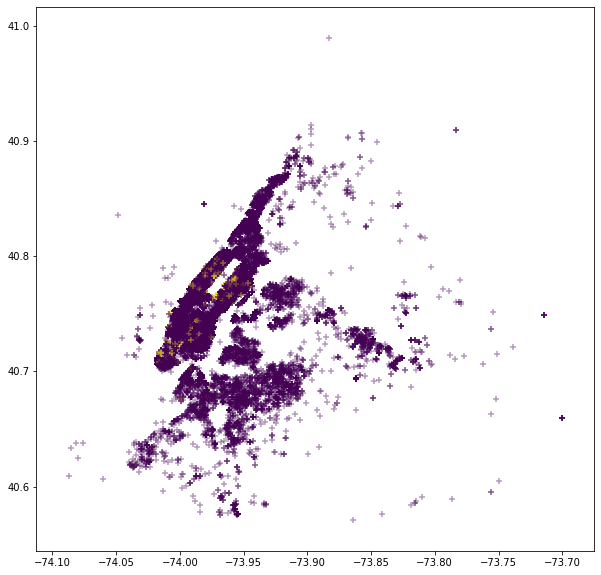

In [565]:
plt.figure(figsize=(10,10))

plt.scatter(df.longitude, df.latitude, alpha=0.4, c=df.high_priced, marker="+")

###We can see that the higher-priced rentals are located in denser areas from the graph above and below

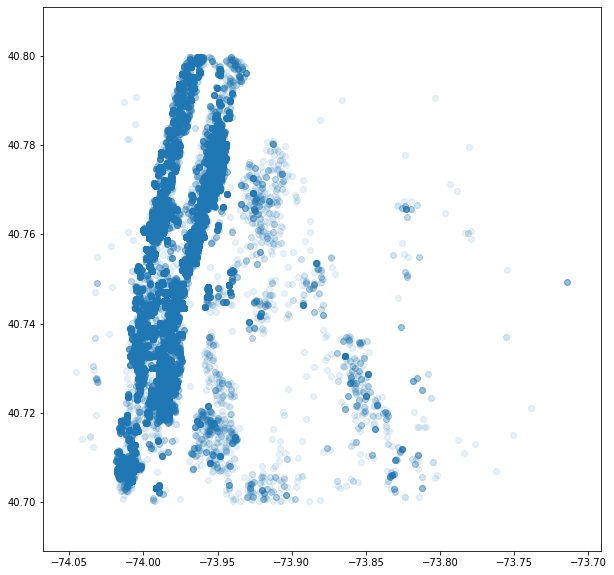

In [566]:
plt.figure(figsize=(10,10))

plt.scatter(hplat.longitude, hplat.latitude, alpha=0.1)

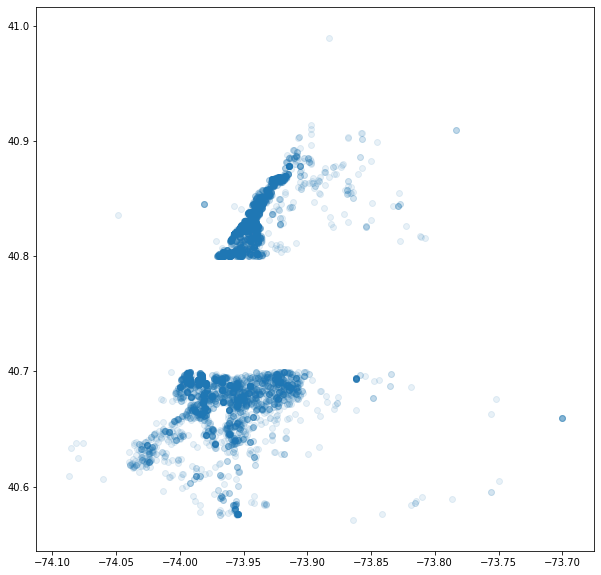

In [567]:
plt.figure(figsize=(10,10))

plt.scatter(not_high_priced.longitude, not_high_priced.latitude, alpha=0.1)

In [0]:
from sklearn.linear_model import LinearRegression
import numpy as np

In [0]:
lr_model = LinearRegression()

In [0]:
less_than_40 = df[df.latitude<=40.8]

In [0]:
less_than_40_x = less_than_40.latitude.values.reshape(-1,1)

In [0]:
less_than_40_y = less_than_40.price.values.reshape(-1,1)

In [0]:
X_array = X.latitude.values.reshape(-1,1)

In [574]:
lr_model.fit(less_than_40_x,less_than_40_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [575]:
X.latitude.describe()

count    48818.000000
mean        40.750756
std          0.038962
min         40.571200
25%         40.728300
50%         40.751700
75%         40.774000
max         40.989400
Name: latitude, dtype: float64

In [0]:
X_axis = np.linspace(40.571200, 40.8).reshape(-1, 1)

In [0]:
y_pred = lr_model.predict(X_axis)

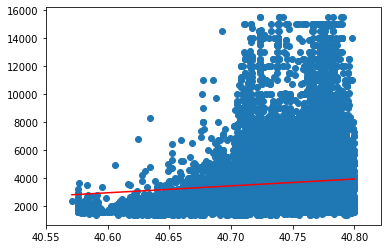

In [578]:
plt.scatter(less_than_40_x, less_than_40_y)
plt.plot(X_axis, y_pred, color="r");

##I removed the data beyond 40.8 degrees latitude so that I wouldn't be attempting to apply linear regression to data that was clearly non-linear.  Still the data is so spread out beyond 40.7 that the regression line only barely slopes upward. We can see the specific y-intercept and slope below. 


In [579]:
lr_model.coef_

array([[4910.88461385]])

In [580]:
lr_model.intercept_

array([-196425.20877217])

In [581]:
lr_model.predict([[40.65]])

array([[3202.25078099]])

The regression line crosses the y_axis where why is -196425.  This value does not have much meaning on its own because you won't be able to find a house in which you are essentially given $196,000. The slope (coef_) is just the number that shows how the regression slants upward or downward. 

In [582]:
def predict(latitude):
    y_pred2 = lr_model.predict([[latitude]])
    estimate = y_pred2[0]
    coefficient = lr_model.coef_[0]
    result=(('${} estimated price for a house in NYC at a latitude of {}.').format(estimate, latitude))
    explanation=(('In this linear regression, less than a hundredth of a degree increase in latitude results in a price increase of ${}.').format(coefficient))
    return (result + '\n' + explanation)

print(predict(1497))

$[7155169.05816703] estimated price for a house in NYC at a latitude of 1497.
In this linear regression, less than a hundredth of a degree increase in latitude results in a price increase of $[4910.88461385].
